In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('winequality-red.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [8]:
X = df.drop('quality', axis=1)
y = df['quality']
y = y.apply(lambda q: 'Low' if q <= 5 else ('Medium' if q == 6 else 'High'))

In [9]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [10]:
# Apply Linear Discriminant Analysis
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

# Predict on test data
y_pred_lda = lda.predict(X_test)

# Evaluate the model
accuracy_lda = accuracy_score(y_test, y_pred_lda)
print(f"Linear Discriminant Analysis Accuracy: {accuracy_lda:.2f}")

# Confusion matrix
conf_matrix_lda = confusion_matrix(y_test, y_pred_lda)
print("\nConfusion Matrix (LDA):")
print(conf_matrix_lda)

# Classification report
print("\nClassification Report (LDA):")
print(classification_report(y_test, y_pred_lda))


Linear Discriminant Analysis Accuracy: 0.59

Confusion Matrix (LDA):
[[ 27   3  37]
 [  7 164  42]
 [ 32  76  92]]

Classification Report (LDA):
              precision    recall  f1-score   support

        High       0.41      0.40      0.41        67
         Low       0.67      0.77      0.72       213
      Medium       0.54      0.46      0.50       200

    accuracy                           0.59       480
   macro avg       0.54      0.54      0.54       480
weighted avg       0.58      0.59      0.58       480



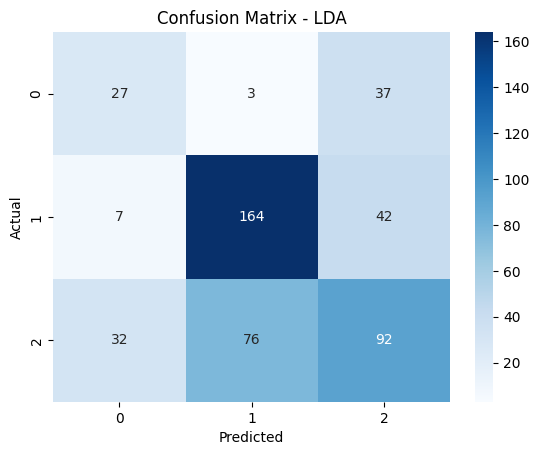

In [11]:
# Visualize Confusion Matrix (LDA)
sns.heatmap(conf_matrix_lda, annot=True, cmap="Blues", fmt='g')
plt.title("Confusion Matrix - LDA")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
